<img src='https://i.ytimg.com/vi/-s8er6tHD3o/maxresdefault.jpg' style='height:400px'>

<div class="list-group" id="list-tab" role="tablist">
  <h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">&nbsp;Summary:</h1>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="profile">1. Introduction<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages">2. Twitter Users<span class="badge badge-primary badge-pill">2</span></a>
   <a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab" aria-controls="messages">3. News Structure<span class="badge badge-primary badge-pill">3</span></a>
   <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="messages">4. Words Relevance<span class="badge badge-primary badge-pill">4</span></a>    <a class="list-group-item list-group-item-action" data-toggle="list" href="#5" role="tab" aria-controls="messages">5. Conclusion<span class="badge badge-primary badge-pill">5</span></a>
</div>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
fileName_03_2021 = 'data/moby-bikes-historical-data-032021.csv'

In [32]:
bikes_03_2021 = pd.read_csv(fileName_03_2021)

In [33]:
bikes_03_2021

,HarvestTime,BikeID,Battery,BikeIdentifier,BikeTypeName,EBikeProfileID,EBikeStateID,IsEBike,IsMotor,IsSmartLock,LastGPSTime,LastRentalStart,Latitude,Longitude,SpikeID
0,2021-03-01 00:00:03,5,31.0,1,DUB-General,1,2,True,False,False,2021-02-28 23:30:33,2021-02-28 20:26:54,53.3430,-6.23879,1
1,2021-03-01 00:00:03,6,33.0,2,DUB-General,1,2,True,False,False,2021-02-28 23:48:14,2021-02-28 13:28:38,53.3853,-6.25801,2
2,2021-03-01 00:00:03,8,42.0,4,DUB-General,1,2,True,False,False,2021-02-28 23:48:12,2021-02-28 15:51:17,53.3632,-6.23584,4
3,2021-03-01 00:00:03,16,41.0,14,DUB-General,1,2,True,False,False,2021-02-28 23:57:47,2021-02-28 16:45:26,53.3632,-6.23587,14
4,2021-03-01 00:00:03,20,-6.0,18,DUB-General,1,2,True,False,False,2021-02-28 23:31:16,2021-02-28 18:59:39,53.3433,-6.27317,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66471,2021-03-21 00:30:02,117,7.0,105,DUB-General,1,2,True,False,False,2021-03-21 00:09:15,2021-03-20 14:25:48,53.3392,-6.25065,105
66472,2021-03-21 00:30:02,118,NaN,32,DUB-General,1,2,True,False,False,2021-03-19 15:43:39,2021-03-19 12:49:55,0.0000,0.00000,32
66473,2021-03-21 00:30:02,120,66.0,101,DUB-General,1,2,True,False,False,2021-03-20 19:39:24,2021-03-19 09:49:41,53.3768,-6.26979,101
66474,2021-03-21 00:30:02,122,NaN,115,DUB-General,1,2,True,False,False,2021-03-01 15:30:44,2021-03-19 12:09:45,0.0000,0.00000,115


In [10]:
bikes_03_2021.shape

(66476, 15)

In [11]:
bikes_03_2021['Battery'].describe()

count    64330.000000
mean        62.035815
std         23.208544
min        -12.000000
25%         46.000000
50%         68.000000
75%         81.000000
max         98.000000
Name: Battery, dtype: float64

<AxesSubplot:xlabel='Battery', ylabel='Density'>

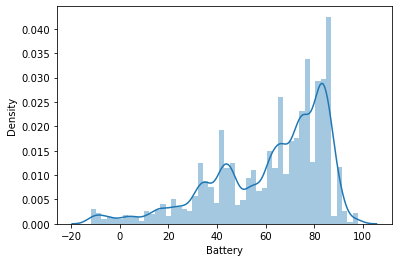

In [15]:
sns.distplot(bikes_03_2021['Battery'])

In [45]:
n_by_bike = bikes_03_2021.groupby("BikeID")["BikeID"].count()
n_by_bike.head(10)

BikeID
5     907
6     904
7     785
8     271
9     700
10    850
12    458
13    481
14    678
15    182
Name: BikeID, dtype: int64

In [39]:
df = bikes_03_2021.loc[:,['BikeID','Battery','LastGPSTime','LastRentalStart']]

In [44]:
df.head

<bound method NDFrame.head of        BikeID  Battery          LastGPSTime      LastRentalStart
0           5     31.0  2021-02-28 23:30:33  2021-02-28 20:26:54
1           6     33.0  2021-02-28 23:48:14  2021-02-28 13:28:38
2           8     42.0  2021-02-28 23:48:12  2021-02-28 15:51:17
3          16     41.0  2021-02-28 23:57:47  2021-02-28 16:45:26
4          20     -6.0  2021-02-28 23:31:16  2021-02-28 18:59:39
...       ...      ...                  ...                  ...
66471     117      7.0  2021-03-21 00:09:15  2021-03-20 14:25:48
66472     118      NaN  2021-03-19 15:43:39  2021-03-19 12:49:55
66473     120     66.0  2021-03-20 19:39:24  2021-03-19 09:49:41
66474     122      NaN  2021-03-01 15:30:44  2021-03-19 12:09:45
66475     124     81.0  2021-03-21 00:25:13  2021-03-20 18:43:58

[66476 rows x 4 columns]>

In [43]:
df.loc[(df["BikeID"] == "5")]

,BikeID,Battery,LastGPSTime,LastRentalStart
